In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
train_data=pd.read_csv("/kaggle/input/train-and-test-titanic/train.csv")

In [124]:
test_data=pd.read_csv("/kaggle/input/train-and-test-titanic/test.csv")

In [125]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
train_data.shape

(891, 12)

In [127]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
train_data=train_data.drop('Cabin',axis=1)

train_data['Embarked'].fillna(train_data['Embarked'].mode(),inplace=True)

import re
for i , name in enumerate( train_data['Name']):
  if re.search(r'Mr\.',string= str(name)) or re.search(r'Mrs\.',string= str(name)) or re.search(r'Dr\.',string= str(name)) and pd.isna(train_data.loc[i,'Age']):
    train_data.loc[i,'Age']= 35
  elif re.search(r'Miss',string= str(name)) or re.search(r'Master.',string= str(name)) and pd.isna(train_data.loc[i,'Age']):
    train_data.loc[i,'Age']= 17

In [130]:
test_data=test_data.drop('Cabin',axis=1)

test_data['Embarked'].fillna(test_data['Embarked'].mode(),inplace=True)

import re
for i , name in enumerate( test_data['Name']):
  if re.search(r'Mr\.',string= str(name)) or re.search(r'Mrs\.',string= str(name)) or re.search(r'Dr\.',string= str(name)) and pd.isna(test_data.loc[i,'Age']):
    test_data.loc[i,'Age']= 35
  elif re.search(r'Miss',string= str(name)) or re.search(r'Master.',string= str(name)) and pd.isna(test_data.loc[i,'Age']):
    test_data.loc[i,'Age']= 17

In [131]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
train_data['Sex']=label_enc.fit_transform(train_data['Sex'])
train_data['Ticket']=label_enc.fit_transform(train_data['Ticket'])
train_data['Embarked']=label_enc.fit_transform(train_data['Embarked'])

In [132]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
test_data['Sex']=label_enc.fit_transform(test_data['Sex'])
test_data['Ticket']=label_enc.fit_transform(test_data['Ticket'])
test_data['Embarked']=label_enc.fit_transform(test_data['Embarked'])

In [133]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [134]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [135]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [136]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [137]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [138]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [139]:
PassengerId=test_data['PassengerId']

In [140]:
train_data=train_data.drop(['PassengerId','Name','Ticket'],axis=1)

In [141]:
test_data=test_data.drop(['PassengerId','Name','Ticket'],axis=1)


In [142]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [143]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,35.0,1,0,7.2500,2
1,1,1,0,35.0,1,0,71.2833,0
2,1,3,0,17.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,17.0,0,0,30.0000,2
888,0,3,0,17.0,1,2,23.4500,2
889,1,1,1,35.0,0,0,30.0000,0


In [144]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [145]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,35.0,0,0,7.8292,1
1,3,0,35.0,1,0,7.0000,2
2,2,1,35.0,0,0,9.6875,1
3,3,1,35.0,0,0,8.6625,2
4,3,0,35.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,35.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,35.0,0,0,7.2500,2
416,3,1,35.0,0,0,8.0500,2


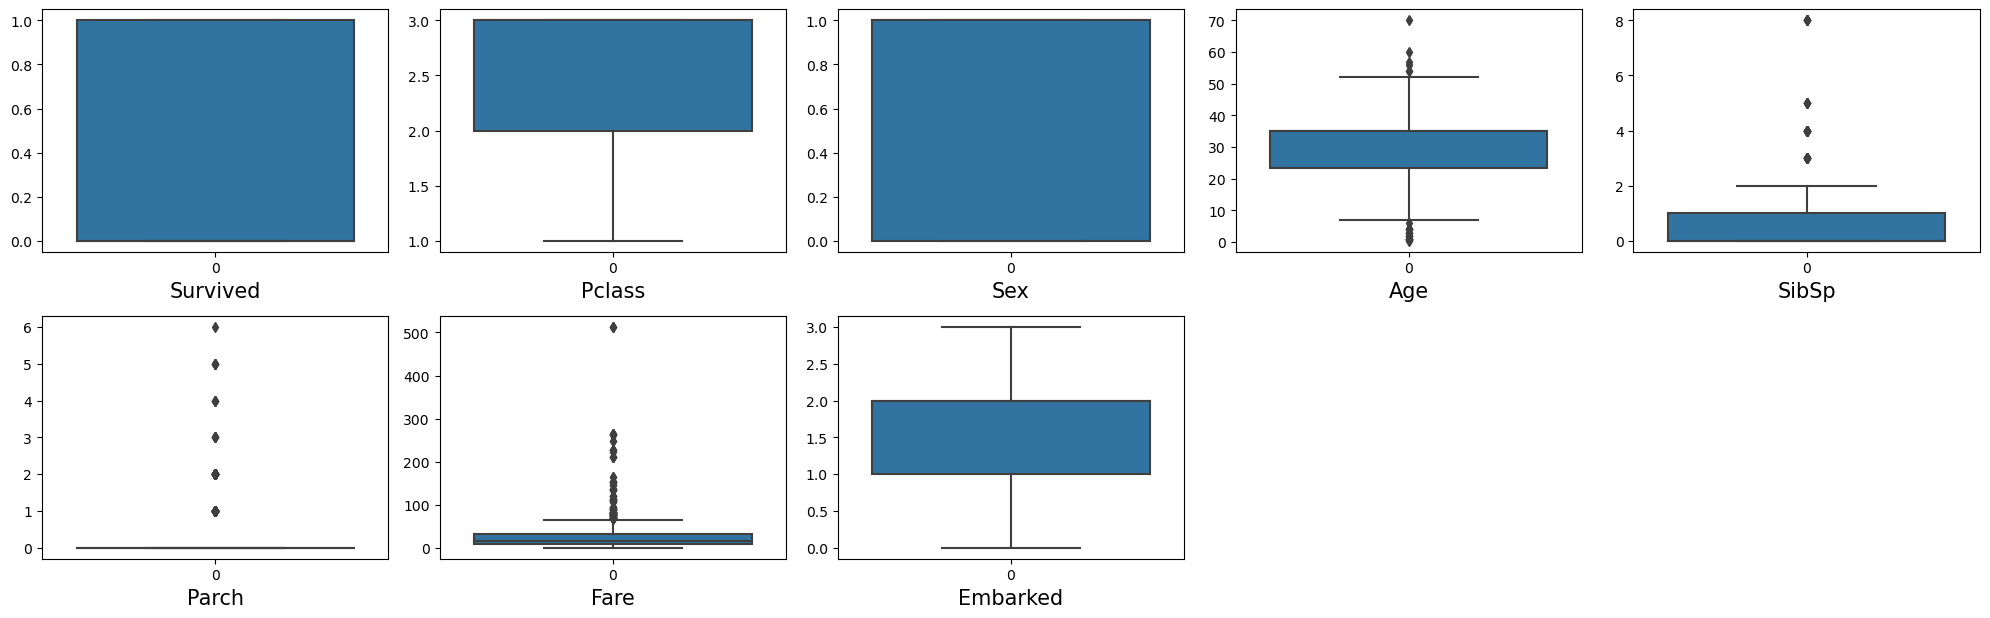

In [146]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in train_data.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(train_data[col])
    plt.xlabel(col,fontsize=15)
  plotnumber+=1
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/si

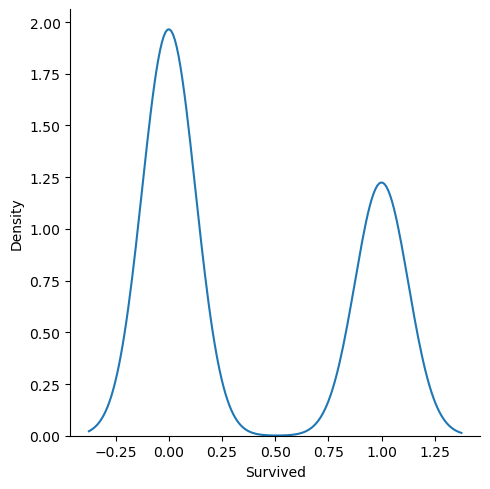

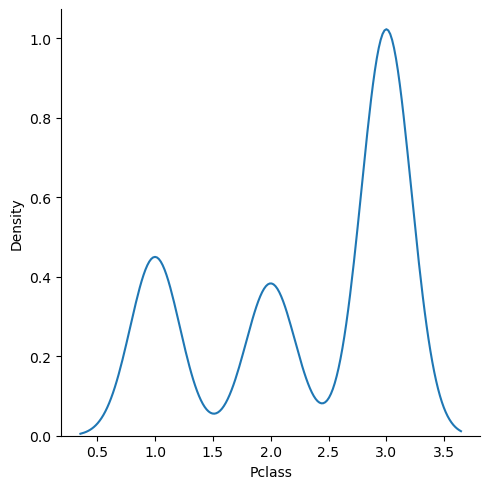

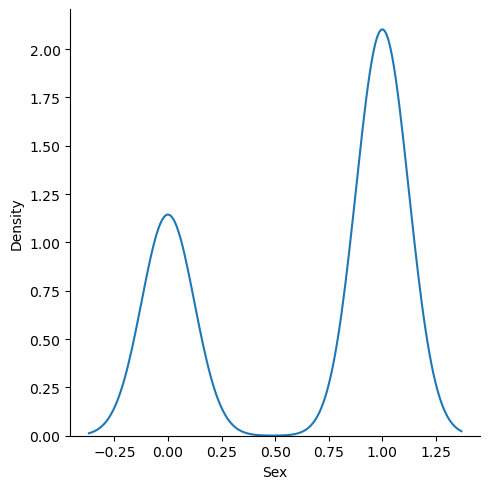

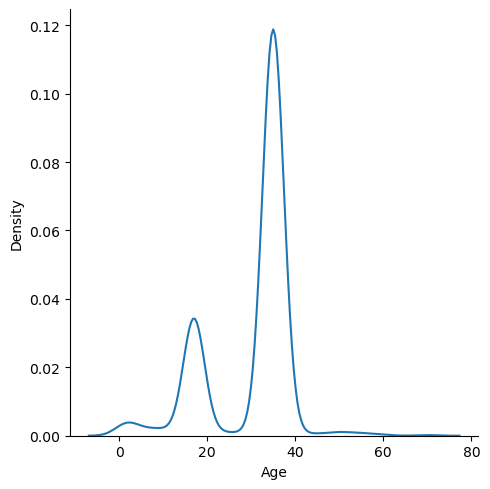

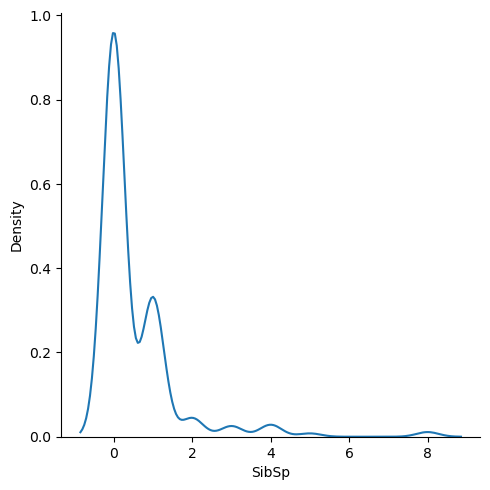

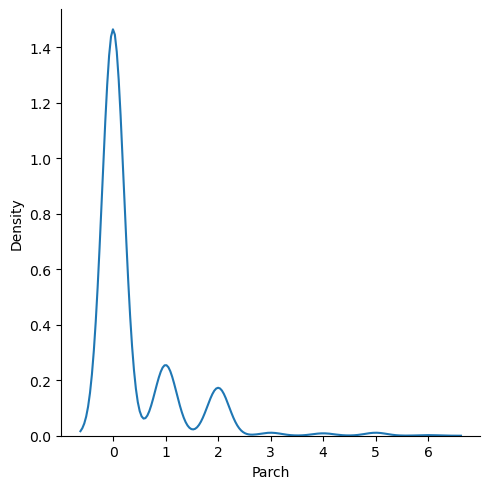

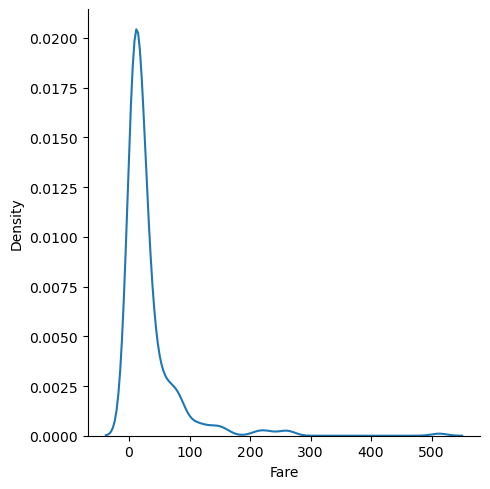

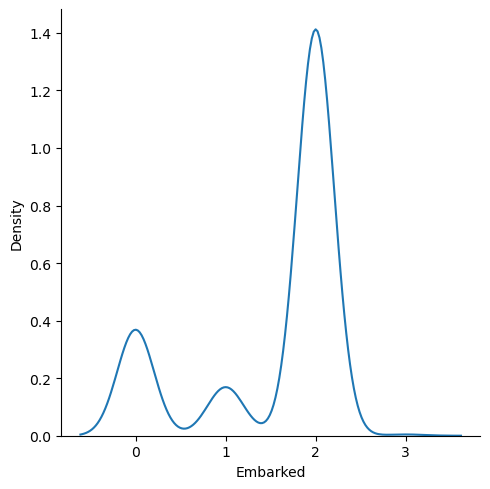

In [147]:
columns=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
for i in columns:
    sns.displot(kind='kde',
           data=train_data,
           x=i)
plt.show()

<Axes: >

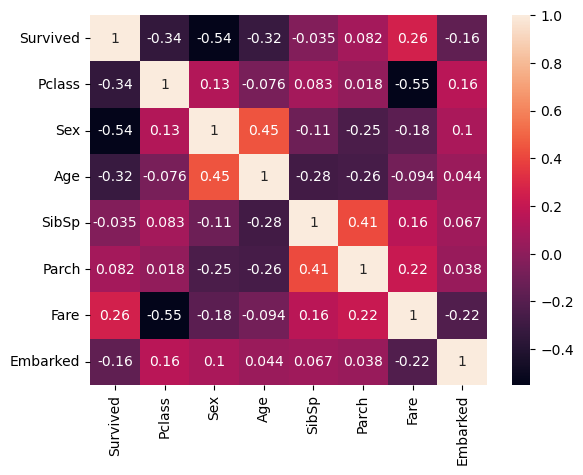

In [148]:
sns.heatmap(train_data.corr(),annot=True)

In [149]:
train_data=train_data.drop(['SibSp','Parch'],axis=1)

In [150]:
test_data=test_data.drop(['SibSp','Parch'],axis=1)

In [151]:
train_data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,35.0,7.2500,2
1,1,1,0,35.0,71.2833,0
2,1,3,0,17.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2
887,1,1,0,17.0,30.0000,2
888,0,3,0,17.0,23.4500,2
889,1,1,1,35.0,30.0000,0


In [152]:
test_data

,Pclass,Sex,Age,Fare,Embarked
0,3,1,35.0,7.8292,1
1,3,0,35.0,7.0000,2
2,2,1,35.0,9.6875,1
3,3,1,35.0,8.6625,2
4,3,0,35.0,12.2875,2
...,...,...,...,...,...
413,3,1,35.0,8.0500,2
414,1,0,39.0,108.9000,0
415,3,1,35.0,7.2500,2
416,3,1,35.0,8.0500,2


In [153]:
x= train_data.drop('Survived',axis=1)
y= train_data.Survived

from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_transformed = scale.fit_transform(x)
x_test_transformed=scale.transform(test_data)

In [154]:
#load models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [155]:
#model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [156]:
#compare models using cv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [157]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('GB',GradientBoostingClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('LGBM',LGBMClassifier()))
models.append(('XGBM',XGBClassifier()))

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.2,random_state=42)

In [159]:
results = []
names=[]

for name, model in models:
  kfold=StratifiedKFold(n_splits=4,random_state=1,shuffle=True)#crossvalidation
  cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print("cv_results",cv_results)
  print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))
  print("")

cv_results [0.80337079 0.74719101 0.78651685 0.78089888]
LR: 0.779494 (0.020401)

cv_results [0.85955056 0.79775281 0.83707865 0.74719101]
KNN: 0.810393 (0.042670)

cv_results [0.8258427  0.79213483 0.8258427  0.7752809 ]
CART: 0.804775 (0.021894)

cv_results [0.8258427  0.80337079 0.83146067 0.76966292]
RF: 0.807584 (0.024286)

cv_results [0.79775281 0.74719101 0.76966292 0.78089888]
NB: 0.773876 (0.018366)

cv_results [0.84831461 0.80898876 0.84831461 0.79213483]
SVM: 0.824438 (0.024609)

cv_results [0.84831461 0.79775281 0.84269663 0.80898876]
GB: 0.824438 (0.021530)

cv_results [0.85393258 0.79775281 0.8258427  0.75842697]
ADA: 0.808989 (0.035308)

cv_results [0.87640449 0.80898876 0.83707865 0.81460674]
LGBM: 0.834270 (0.026500)

cv_results [0.85393258 0.79775281 0.82022472 0.79775281]
XGBM: 0.817416 (0.022993)



In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6]
}

grid= GridSearchCV(LGBMClassifier(),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.804 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.839 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.824 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.754 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.796 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.804 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.839 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.838 total time=   0.5s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.768 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.8

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=3)

In [161]:
grid.best_score_

0.8314291342460358

In [162]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

In [163]:
model_lgb=LGBMClassifier(
    learning_rate =  0.05,
    max_depth = 3,
    n_estimators = 200
    )

In [164]:
model_lgb.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=200)

In [165]:
pred=model_lgb.predict(x_test)

In [166]:
pred=pred.reshape(-1,1)

In [167]:
accuracy_score(y_test,pred)

0.8156424581005587

In [168]:
model_lgb.fit(x_transformed,y)

LGBMClassifier(learning_rate=0.05, max_depth=3, n_estimators=200)

In [169]:
pred=model_lgb.predict(x_test_transformed)

In [170]:
output = pd.DataFrame({'PassengerId':PassengerId, 'Survived': pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
